In [126]:
import numpy as np
import sympy as sm
import unittest
x = sm.symbols("x")

# Newton-Raphson Function Solver

1. Input your function

In [140]:
s = input()
f = sm.sympify(s)
print(f"Your function is {f}")


sin(x)
Your function is sin(x)


2. Input your guess and the number of times you wish to iterate

In [141]:
a = input()
g = float(a)
print(f"Your initial guess is {g}. Now please type how many times you want to iterate")
n = int(input())
print(f"You want to iterate {n} times")

1
Your initial guess is 1.0. Now please type how many times you want to iterate
10
You want to iterate 10 times


In [142]:
def solver(g, n, f):
    NoSols = False
    global guess
    guess = []
    df = sm.diff(f, x)
    print(f"The derivative of {f} is {df}")
    for i in range(0, n):
        fsub = f.subs(x,g)
        dfsub = df.subs(x, g)
        g = g -  (fsub / dfsub)
        guess.append(g)
        print("Iteration " + str(i+1) + " = " + str(g))
        if round(fsub,10) == 0:
            break
        elif i == n-1 and round(fsub,10) != 0:
            NoSols = True
            break
    if NoSols == True:
        return "No Solutions could be found!"
    else:
        return guess[-1]

In [150]:
solver(g, n, f)

The derivative of sin(x) is cos(x)
Iteration 1 = -0.557407724654902
Iteration 2 = 0.0659364519248407
Iteration 3 = -9.57219193250813e-5
Iteration 4 = 2.92356620141231e-13
Iteration 5 = 0


0

In [148]:
class TestNotebook(unittest.TestCase):
    
    def test_solver1(self):
        self.assertEqual(solver(1, 10, x**2 - 1), 1) # Testing if we can find the solution to x^2 - 1

    def test_solver2(self):
        self.assertEqual(solver(1, 10, x**2 + 1), "No Solutions could be found!") # Test that there are no solutions to x^2+1
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_solver1 (__main__.TestNotebook) ... ok
test_solver2 (__main__.TestNotebook) ... 

The derivative of x**2 - 1 is 2*x
Iteration 1 = 1
The derivative of x**2 + 1 is 2*x
Iteration 1 = 0
Iteration 2 = zoo
Iteration 3 = nan
Iteration 4 = nan
Iteration 5 = nan
Iteration 6 = nan
Iteration 7 = nan
Iteration 8 = nan
Iteration 9 = nan
Iteration 10 = nan


ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


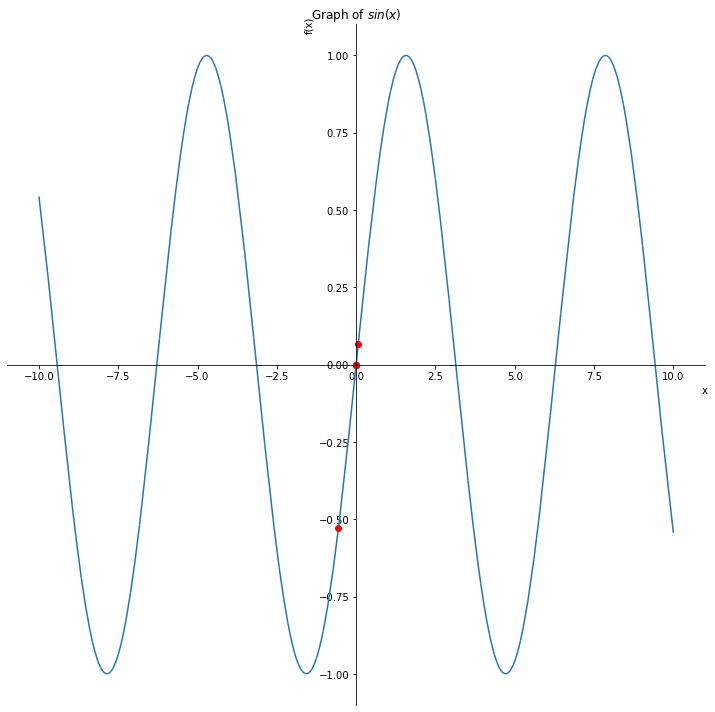

In [151]:
if NoSols == False:
    guess_y = [f.subs('x', g).evalf() for g in guess]
    sm.plot(f, markers=[{'args': [guess, guess_y, 'ro']}], title = f"Graph of ${s}$",size = (10,10))
else:
    sm.plot(f, title = f"Graph of ${s}$", size = (10,10))